<h1> Loading important python modules </h1>


In [1]:
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

<h1>Loading the data to numpy array</h1>

In [2]:
data = np.loadtxt("haberman1.txt")
X = data[:,0:3]
y = data[:,3]
print X
print y

[[ 30.  64.   1.]
 [ 30.  62.   3.]
 [ 30.  65.   0.]
 [ 31.  59.   2.]
 [ 31.  65.   4.]
 [ 33.  58.  10.]
 [ 33.  60.   0.]
 [ 34.  59.   0.]
 [ 34.  66.   9.]
 [ 34.  58.  30.]
 [ 34.  60.   1.]
 [ 34.  61.  10.]
 [ 34.  67.   7.]
 [ 34.  60.   0.]
 [ 35.  64.  13.]
 [ 35.  63.   0.]
 [ 36.  60.   1.]
 [ 36.  69.   0.]
 [ 37.  60.   0.]
 [ 37.  63.   0.]
 [ 37.  58.   0.]
 [ 37.  59.   6.]
 [ 37.  60.  15.]
 [ 37.  63.   0.]
 [ 38.  69.  21.]
 [ 38.  59.   2.]
 [ 38.  60.   0.]
 [ 38.  60.   0.]
 [ 38.  62.   3.]
 [ 38.  64.   1.]
 [ 38.  66.   0.]
 [ 38.  66.  11.]
 [ 38.  60.   1.]
 [ 38.  67.   5.]
 [ 39.  66.   0.]
 [ 39.  63.   0.]
 [ 39.  67.   0.]
 [ 39.  58.   0.]
 [ 39.  59.   2.]
 [ 39.  63.   4.]
 [ 40.  58.   2.]
 [ 40.  58.   0.]
 [ 40.  65.   0.]
 [ 41.  60.  23.]
 [ 41.  64.   0.]
 [ 41.  67.   0.]
 [ 41.  58.   0.]
 [ 41.  59.   8.]
 [ 41.  59.   0.]
 [ 41.  64.   0.]
 [ 41.  69.   8.]
 [ 41.  65.   0.]
 [ 41.  65.   0.]
 [ 42.  69.   1.]
 [ 42.  59.   0.]
 [ 42.  58

<p> 1 represents that the given patient survived 5 years after the surgery <br>
 2 represents that the given patient didnt survived 5 years after the surgery </p>

<h1> Splitting dataset into train and test data </h1>

In [3]:
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.2,random_state=40)


<h1> Visualising data </h1>

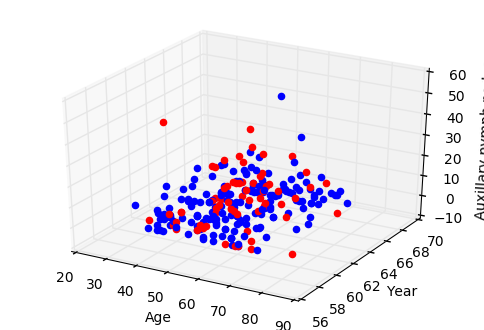

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')

for i in range(len(y_train)):
    if y_train[i]==1 :
        xs = X_train[i][0]
        ys = X_train[i][1]
        zs = X_train[i][2]
        ax1.scatter(xs, ys, zs, color='blue')
    elif y_train[i]==2:
        xs = X_train[i][0]
        ys = X_train[i][1]
        zs = X_train[i][2]
        ax1.scatter(xs, ys, zs, color='red')
        

ax1.set_xlabel('Age')
ax1.set_ylabel('Year')
ax1.set_zlabel('Auxillary nymph nodes')

plt.show()

<h1> Applying Logistic Regression on our data </h1>
<h3> Fitting on training data </h3>

In [5]:
model_log = LogisticRegression()
model_log = model_log.fit(X_train,y_train)

<h3> Calculating Accuracy </h3>

In [6]:
print "Train Accuracy for Logistic Regression Model",model_log.score(X_train,y_train)*100
print "Test Accuracy for Logistic Regression Model",model_log.score(X_test,y_test)*100

Train Accuracy for Logistic Regression Model 74.5901639344
Test Accuracy for Logistic Regression Model 77.4193548387


<h3> Calculating precision and recall </h3>

In [7]:
print "precision of log Model", precision_score(y,model_log.predict(X))
print "recall of log Model", recall_score(y,model_log.predict(X))

precision of log Model 0.76512455516
recall of log Model 0.955555555556


<h1> Applying SVM on our data </h1>

<h3> Fiting the training data </h3>

In [8]:
model_svm = svm.SVC()
model_svm = model_svm.fit(X_train,y_train)

<h3> Finding train and test accuracy </h3>

In [9]:
print "Train Accuracy for SVM Model",model_svm.score(X_train,y_train)*100
print "Test Accuracy for SVM Model",model_svm.score(X_test,y_test)*100

Train Accuracy for SVM Model 90.1639344262
Test Accuracy for SVM Model 77.4193548387


<h3> Finding Precision and Recall </h3>

In [10]:
print "precision of svm Model", precision_score(y,model_svm.predict(X))
print "recall of svm Model", recall_score(y,model_svm.predict(X))

precision of svm Model 0.855513307985
recall of svm Model 1.0


<h1> Applying Decision Tree Classification on our dataset </h1>

<h3> Fitting the training data </h3>

In [11]:
model_tree = DecisionTreeClassifier()
model_tree = model_tree.fit(X_train,y_train)

<h3> Finding train and test accuracy </h3>

In [12]:
print "Train Accuracy for Decision Tree Model",model_tree.score(X_train,y_train)*100
print "Test Accuracy for Decison Tree Model",model_tree.score(X_test,y_test)*100

Train Accuracy for Decision Tree Model 99.1803278689
Test Accuracy for Decison Tree Model 66.1290322581


<p><b> We can see that the Decision Tree fits the training data extremely well but makes huge amount of errors on the test data. This is called Overfiting. Overfiting in decision trees can be prevented by decreasing the depth of the tree.</b> </p>

<h3> Preventing Overfiting </h3>

In [13]:
model_tree2 = DecisionTreeClassifier(max_depth=3)
model_tree2 = model_tree2.fit(X_train,y_train)
print "Train Accuracy for Decision Tree2 Model",model_tree2.score(X_train,y_train)*100
print "Test Accuracy for Decison Tree2 Model",model_tree2.score(X_test,y_test)*100

Train Accuracy for Decision Tree2 Model 79.0983606557
Test Accuracy for Decison Tree2 Model 75.8064516129


<h3> Finding precision and recall </h3>

In [14]:
print "precision of tree2 Model", precision_score(y_test,model_tree2.predict(X_test))
print "recall of tree2 Model", recall_score(y_test,model_tree2.predict(X_test))

precision of tree2 Model 0.823529411765
recall of tree2 Model 0.875


<p> <b>This clearly shows that the svm performs best on our dataset</b> </p>


<h1> Making Predictions on new patients </h1>

In [15]:
def make_prediction(age,year,nodes,model = model_svm):
    feature = [[age,year,nodes]]
    if model_svm.predict(feature) == 1:
        print "No Risk"
    if model_svm.predict(feature) == 2:
        print "Risk"

make_prediction(50,69,10)

No Risk
